In [1]:
#looking at how AF correlates with L70 sections and predictions 
from malb_test_sets import * 
from pipeline_interaction_regression_l2 import load_dataset_single
from predictor_comparisons import *
from processing_functions import *
import pickle
import pandas as pd
import numpy as np
from sklearn import preprocessing
#split up v1, v2, v3
from sklearn import linear_model
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.utils import resample
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=FutureWarning)
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
from multiprocessing import Pool
from sklearn.model_selection import StratifiedKFold
from malb_test_sets import *
import seaborn as sns

In [2]:
v2_malbs = open_malb_predictions('v2')[0]
v3_malbs = open_malb_predictions('v3')[0]

['chain A and resid 54']
['chain A and resid 36', 'chain B and resid 36']
['chain A and resid 36', 'chain B and resid 36']
['chain A and resid 36', 'chain B and resid 36']
['chain B and resid 46']
['chain A and resid 7', 'chain B and resid 9']
['chain A and resid 21,30']
['chain A and resid 1', 'chain B and resid 26']
['chain B and resid 2,58']
['chain A and resid 7,45']
['chain A and resid 43', 'chain B and resid 9']
['chain B and resid 46']
['chain A and resid 43', 'chain B and resid 16']
['chain B and resid 46']
['chain A and resid 36', 'chain B and resid 24']
['chain A and resid 36', 'chain B and resid 33']
['chain A and resid 6', 'chain B and resid 7']
['chain B and resid 2,58']
['chain A and resid 9', 'chain B and resid 46']
['chain B and resid 46']
['chain A and resid 46']
['chain A and resid 7', 'chain B and resid 9']
['chain A and resid 36', 'chain B and resid 36']
['chain A and resid 36', 'chain B and resid 36']
['chain A and resid 36', 'chain B and resid 36']
['chain A and r

In [4]:

avgs_df = v2_malbs.groupby(['ppi']).mean()
avgs_df['ppi'] = avgs_df.index
avgs_df['PPI'] = avgs_df['ppi'].apply(lambda x: 'DBD' + ':' + x.split('|')[0] + ':' + 'AD:' + x.split('|')[1])


In [ ]:
order_pros = ['1001__mALb8x1_fdrtc_A',
              '1002__mALb8x1_rprtc_A',
              '1003__mALb8x2_fdrtc_A',
              '1004__mALb8x2_rprtc_A',
              '1005__mALb8x12_fdrtc_A',
              '1006__mALb8x12_rprtc_A',
              '1007__mALb8x12j_fdrtc_A',
              '1008__mALb8x12j_rprtc_A',
              'mALb8_A',
              'mALb8_cutT1_A',
               'mALb8_cutT2_A',
 '1001__mALb8x1_fdrtc_B',
 
 '1002__mALb8x1_rprtc_B',
 
 '1003__mALb8x2_fdrtc_B',
 
 '1004__mALb8x2_rprtc_B',
 
 '1005__mALb8x12_fdrtc_B',
 
 '1006__mALb8x12_rprtc_B',
 
 '1007__mALb8x12j_fdrtc_B',
 
 '1008__mALb8x12j_rprtc_B',
 
 'mALb8_B',
 
 'mALb8_cutT1_B',

 'mALb8_cutT2_B']

for col in ['ptm', 'iptm']:
    make_square_heatmap(make_specific_order(order_pros, avgs_df, col), float('-inf'), order_pros, 'bone_r', saveName = col + '_v3.svg')

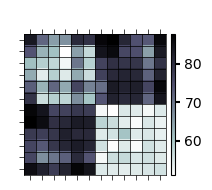

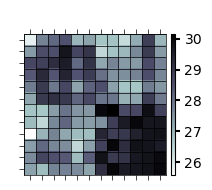

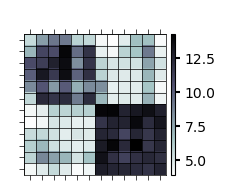

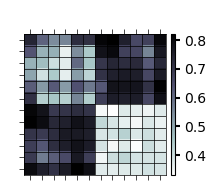

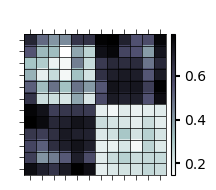

In [13]:
order_pros = ['1001__mALb8x1_fdrtc_A',
              '1002__mALb8x1_rprtc_A',
              '1003__mALb8x2_fdrtc_A',
              '1004__mALb8x2_rprtc_A',
              '1005__mALb8x12_fdrtc_A',
              '1006__mALb8x12_rprtc_A',
              
             
 '1001__mALb8x1_fdrtc_B',
 
 '1002__mALb8x1_rprtc_B',
 
 '1003__mALb8x2_fdrtc_B',
 
 '1004__mALb8x2_rprtc_B',
 
 '1005__mALb8x12_fdrtc_B',
 
 '1006__mALb8x12_rprtc_B',
 
 ]

for col in ['plddt', 'max_pae', 'pae', 'ptm',
       'iptm']:
    make_square_heatmap(make_specific_order(order_pros, avgs_df, col), float('-inf'), order_pros, 'bone_r', saveName = col + '_v3.svg')